# Task 3 - Unemployment in India


- The story behind this datasets is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19.

-------------------------------------------------------------------------------------------------------------------------------

- This dataset contains the unemployment rate of all the states in India.

   - Region = states in India

   - Date = date which the unemployment rate observed

   - Frequency = measuring frequency (Monthly)

   - Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India

   - Estimated Employed = percentage of people employed

   - Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force
   
------------------------------------------------------------------------------------------------------------------------------

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress only DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the dataset 

df = pd.read_csv('Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
df.shape

(768, 7)

In [9]:
#Finding out any missing values

df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
#Dropping Duplicates

df= df.drop_duplicates()     
df.shape

(741, 7)

# Understanding the dataset using basic EDA

In [12]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [16]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

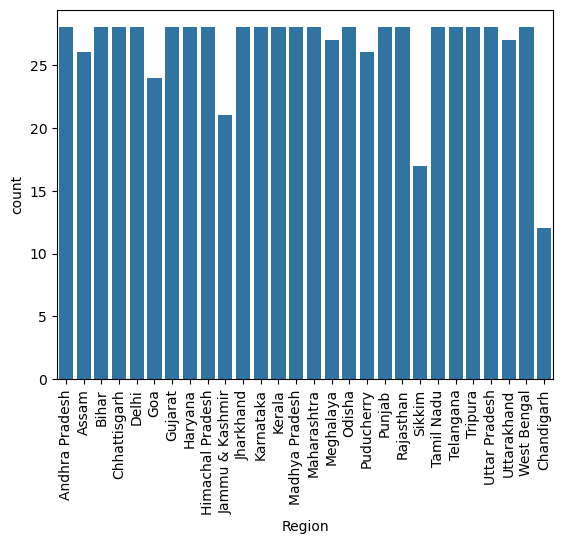

In [17]:
#Plotting region 

sns.countplot(x=df['Region'])
plt.xticks(rotation=90)
plt.show()

INSIGHTS - 

- Population: The graph might represent the population of each state or union territory. States with taller bars would have larger populations.

- Economic Indicators: The graph could depict economic metrics like GDP, per capita income, or industrial output. Higher bars would indicate stronger economic performance.

- Social Indicators: The data might represent social factors such as literacy rates, crime rates, or healthcare access. Taller bars could signify better outcomes.

- Natural Resources: The graph might show the distribution of natural resources like minerals, forests, or water bodies. Higher bars would indicate greater abundance

In [18]:
df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

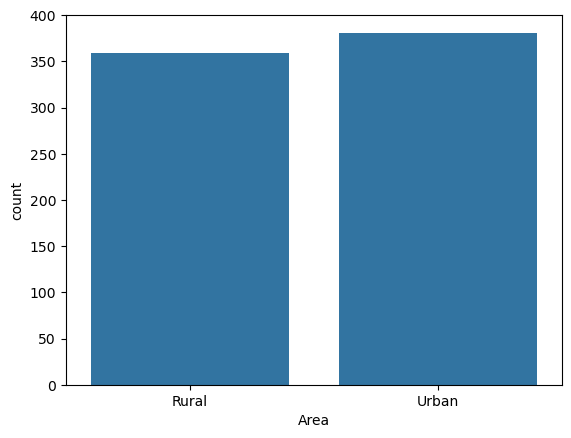

In [19]:
#Understanding Area dynamics

sns.countplot(x=df['Area'])
plt.show()

INSIGHT - 

- The graph suggests that there is a higher count of the measured quantity in urban areas compared to rural areas. The bar representing "Urban" is taller than the bar representing "Rural."

In [21]:
df[' Frequency'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Monthly
1       Monthly
2       Monthly
3       Monthly
4       Monthly
         ...   
749     Monthly
750     Monthly
751     Monthly
752     Monthly
753     Monthly
Name:  Frequency, Length: 741, dtype: object>

- As seen above Frequency column isnt providing us much insight, we can actually drop it off

In [ ]:
df = df.drop([' Frequency'],axis = 1)

In [25]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


In [27]:
# Let us rename the columns for easier access


df= df.rename(columns={ ' Estimated Unemployment Rate (%)' : 'est_unemp_perc', ' Estimated Employed' : 'est_emp',
                          ' Estimated Labour Participation Rate (%)' : 'est_labour_perc'}).reset_index(drop = True)

In [28]:
df.head()

,Region,Date,est_unemp_perc,est_emp,est_labour_perc,Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


In [29]:
df.isnull().sum()

Region             1
 Date              1
est_unemp_perc     1
est_emp            1
est_labour_perc    1
Area               1
dtype: int64

- We can see still that there are still columns are empty, so we would go ahead and fill them

In [30]:
#Importing pd_datetimeframe so that it is easy to work with Date Column

import datetime as dt

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           740 non-null    object 
 1    Date            740 non-null    object 
 2   est_unemp_perc   740 non-null    float64
 3   est_emp          740 non-null    float64
 4   est_labour_perc  740 non-null    float64
 5   Area             740 non-null    object 
dtypes: float64(3), object(3)
memory usage: 34.9+ KB


In [35]:
df[' Date'] = pd.to_datetime(df[' Date'])

In [36]:
df[' Date']=df[' Date'].fillna((df[' Date']).mean())

In [40]:
df['Region']=df['Region'].fillna((df['Region']).mode()[0])
df['est_unemp_perc']=df['est_unemp_perc'].fillna((df['est_unemp_perc']).mean())
df['est_emp']=df['est_emp'].fillna((df['est_emp']).mean())
df['est_labour_perc']=df['est_labour_perc'].fillna((df['est_labour_perc']).mean())
df['Area']=df['Area'].fillna((df['Area']).mode()[0])

In [41]:
df.isnull().sum()

Region             0
 Date              0
est_unemp_perc     0
est_emp            0
est_labour_perc    0
Area               0
dtype: int64

- We can see that there is no null values now. 

In [43]:
df.head()

,Region,Date,est_unemp_perc,est_emp,est_labour_perc,Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural


In [46]:
#Finding correlation between the numeric components 

df[['est_unemp_perc', 'est_emp', 'est_labour_perc']].corr()

,est_unemp_perc,est_emp,est_labour_perc
est_unemp_perc,1.000000,-0.222876,0.002558
est_emp,-0.222876,1.000000,0.011300
est_labour_perc,0.002558,0.011300,1.000000


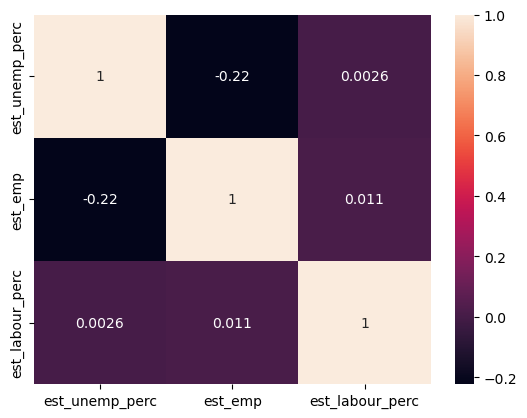

In [47]:
#Plotting the correlation

sns.heatmap(df[['est_unemp_perc', 'est_emp', 'est_labour_perc']].corr(),annot= True)
plt.show()

- INSIGHTS

-------------------------------------------------------------------------------------------------------------------------------

- The diagonal of the heatmap shows a perfect correlation (1) between each variable and itself, which is expected.
- Correlation between est_unemp_perc and est_emp (-0.22):
- There is a weak negative correlation between est_unemp_perc (estimated unemployment percentage) and est_emp (estimated employment). A value of -0.22 suggests that as the unemployment rate increases slightly, the employment rate tends to decrease slightly, but the relationship is not strong.
- Correlation between est_unemp_perc and est_labour_perc (0.0026):
- The correlation between est_unemp_perc (estimated unemployment percentage) and est_labour_perc (estimated labor force participation percentage) is almost negligible (0.0026). This indicates that there's no meaningful linear relationship between these two variables.
- Correlation between est_emp and est_labour_perc (0.011):
- Similarly, the correlation between est_emp (estimated employment) and est_labour_perc (estimated labor force participation percentage) is also very weak and almost zero (0.011), indicating no significant linear relationship.

-------------------------------------------------------------------------------------------------------------------------------

- The overall correlations between the variables are quite weak, suggesting that these variables do not have strong linear relationships with each other. This might imply that other factors not included in this analysis could be influencing these variables, or that the relationships between these variables are more complex and not well-represented by linear correlation.

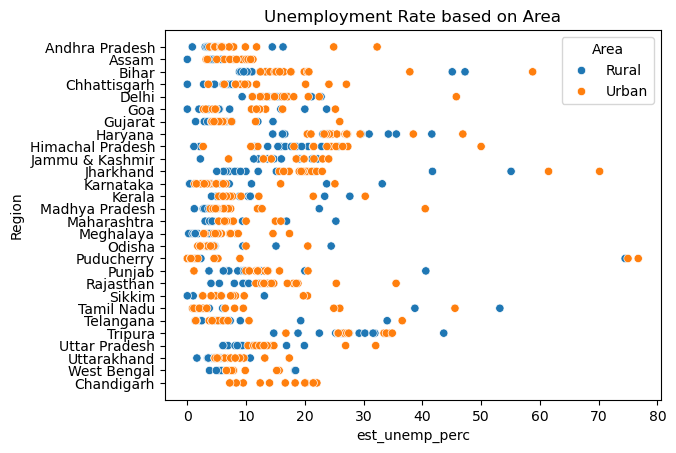

In [48]:
#Plotting scatterplot to understand the movement of the data

plt.title('Unemployment Rate based on Area')
sns.scatterplot(y=df['Region'],x=df['est_unemp_perc'],hue=df['Area'])
plt.show()

INSIGHTS - 

- Urban vs. Rural Unemployment Rates:


  - Urban Areas (Orange dots):
  - There seems to be a broader spread of unemployment rates in urban areas, with some regions showing higher unemployment percentages (up to around 70% in some extreme cases).
  
  - Rural Areas (Blue dots):
  - In rural areas, the unemployment rates tend to cluster more around the lower to mid-range values (up to about 30-40%). This suggests that while unemployment is present, extreme values are less common in rural regions compared to urban areas.
  
-------------------------------------------------------------------------------------------------------------------------------  
- Regional Variations:

  - Certain regions, such as Bihar, Uttar Pradesh, West Bengal, and Madhya Pradesh, show significant clustering of data points, indicating a wide range of unemployment rates within these regions. This could reflect diverse economic conditions across different parts of these regions.
  
  - Delhi, on the other hand, seems to show a more concentrated range of unemployment rates, mostly within the mid-range, indicating a more consistent economic condition within the region.

-------------------------------------------------------------------------------------------------------------------------------
- Outliers:

  - There are a few outlier points, particularly in urban areas, where unemployment rates are extremely high (above 50%). This could indicate regions facing severe economic challenges or data reporting anomalies that might warrant further investigation.

-------------------------------------------------------------------------------------------------------------------------------

- Patterns by Area Type:

   - The data suggests a general trend where urban areas (orange) might be facing higher unemployment rates than rural areas (blue). This could be due to various factors such as the saturation of job markets in urban regions, migration, or economic disparities between rural and urban settings.
 
-------------------------------------------------------------------------------------------------------------------------------
   
- Densely Packed Regions:

  - In some regions like Andhra Pradesh, Gujarat, and Haryana, data points are densely packed within a specific range, indicating a uniform unemployment rate across both rural and urban areas.
  
------------------------------------------------------------------------------------------------------------------------------- 
- General Observations:

  - The plot effectively visualizes the distribution and variance of unemployment rates across different regions and areas (urban vs. rural). The noticeable differences between rural and urban areas highlight the importance of considering geographic factors in economic planning and unemployment mitigation strategies.

  - The clustering in certain regions suggests that unemployment might be influenced by localized factors, such as regional industries, infrastructure, or government policies.
  
------------------------------------------------------------------------------------------------------------------------------  

# Bivariate Analysis between the columns

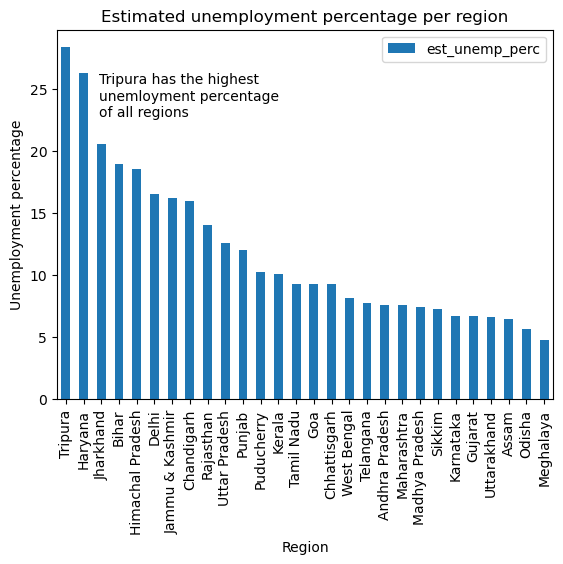

In [50]:
df1 = df.groupby('Region')[['est_unemp_perc']].mean().sort_values(by='est_unemp_perc',ascending= False)
df1.plot(kind='bar')            
plt.title('Estimated unemployment percentage per region')
plt.ylabel('Unemployment percentage')
plt.xticks(rotation= 90)
plt.figtext(x= 0.19, y= 0.7, s= 'Tripura has the highest\nunemloyment percentage\nof all regions')
plt.show()

INSIGHTS - 

- High Unemployment Regions:

  - Tripura has the highest estimated unemployment percentage of all regions, with a rate exceeding 25%. This makes it a significant outlier and a region of concern in terms of unemployment.
  
  - Haryana, Jharkhand, Bihar, and Himachal Pradesh also exhibit relatively high unemployment rates, all above 15%. These regions, along with Tripura, indicate areas where unemployment is particularly problematic.
  
-------------------------------------------------------------------------------------------------------------------------------  
- Moderate to Low Unemployment Regions:

  - Regions such as Tamil Nadu, Kerala, Punjab, and Gujarat show moderate unemployment rates, ranging from around 7% to 10%. These regions may still face unemployment challenges but are in a better situation compared to the highest unemployment regions.
  
  - Meghalaya stands out with the lowest estimated unemployment rate, below 5%. This suggests a relatively stable employment situation in that region.
  
-------------------------------------------------------------------------------------------------------------------------------  
- Distribution of Unemployment Rates:

  - The chart shows a gradual decline in unemployment rates as you move from left to right, indicating that while some regions face significant unemployment challenges, others are managing relatively well.
  
  - The regions with the highest unemployment rates are significantly more elevated than the rest, highlighting that unemployment issues are more acute in specific areas rather than being uniformly distributed.
  
-------------------------------------------------------------------------------------------------------------------------------  
- Focus on Regions with Extremes:

  - The regions at the extremes of this chart (Tripura with the highest, Meghalaya with the lowest) may require tailored policy interventions. High unemployment regions might benefit from job creation programs, skill development, and economic diversification, while lower unemployment regions could focus on sustaining and building on their employment success.

-------------------------------------------------------------------------------------------------------------------------------
  
- General Observations:

  - The chart effectively highlights the disparities in unemployment rates across different regions, offering a clear view of where intervention might be needed most urgently.
  
  - Understanding the factors contributing to high unemployment in regions like Tripura and Haryana could be key to addressing these issues on a national scale.
  
-------------------------------------------------------------------------------------------------------------------------------

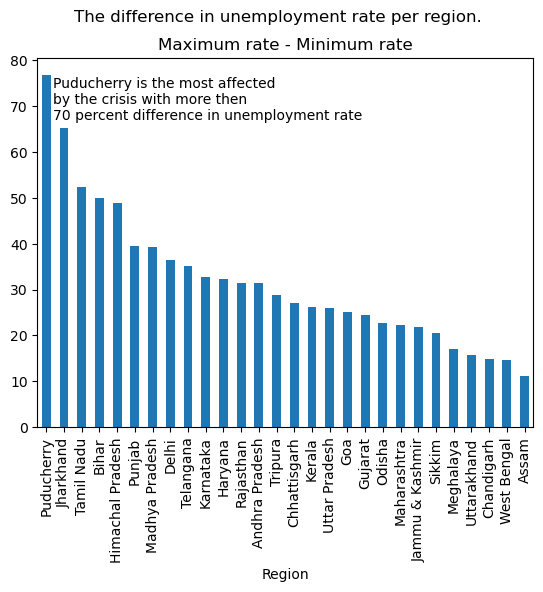

In [51]:
df1= df.groupby('Region')['est_unemp_perc'].agg(lambda x: max(x) - min(x)).sort_values(ascending=False).plot(kind='bar')
plt.suptitle('The difference in unemployment rate per region.')
plt.title('Maximum rate - Minimum rate')
plt.figtext(x= 0.15, y= 0.75, s='Puducherry is the most affected\nby the crisis with more then\n70 percent difference in unemployment rate ')
plt.show()

INSIGHTS - 

- Puducherry is the most affected region, with a difference of more than 70% in unemployment rates.
- Jharkhand and Tamil Nadu also have significant differences in unemployment rates.
- Himachal Pradesh and Punjab have relatively smaller differences.
- West Bengal and Assam have the smallest differences in unemployment rates.

# Reading Dataset 2

In [52]:
df0 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df0

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [53]:
df0.shape

(267, 9)

In [54]:
df0.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

- We can see that there are no missing values. So the dataset needs no tweaking

- Upon observing this dataset, we can say that this data set is an extension of the previous one. 

In [57]:
df0.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

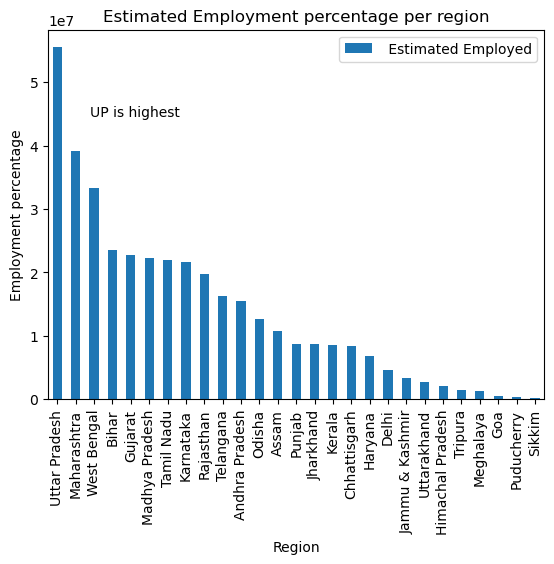

In [60]:
df1 = df0.groupby('Region')[[' Estimated Employed']].mean().sort_values(by=' Estimated Employed',ascending= False)
df1.plot(kind='bar')            
plt.title('Estimated Employment percentage per region')
plt.ylabel('Employment percentage')
plt.xticks(rotation= 90)
plt.figtext(x= 0.19, y= 0.7, s= 'UP is highest')
plt.show()

INSIGHTS - 

- Uttar Pradesh has the highest estimated employment percentage, followed by Maharashtra and West Bengal.- 
- Puducherry has the lowest estimated employment percentage.
- The states in the southern part of India generally have lower estimated employment percentages compared to the northern and western regions.
- Bihar, Gujarat, Madhya Pradesh, and Tamil Nadu have relatively high estimated employment percentages.
- Jharkhand, Kerala, Chhattisgarh, Haryana, and Delhi have relatively low estimated employment percentages.
- There are significant regional disparities in employment percentages across India.

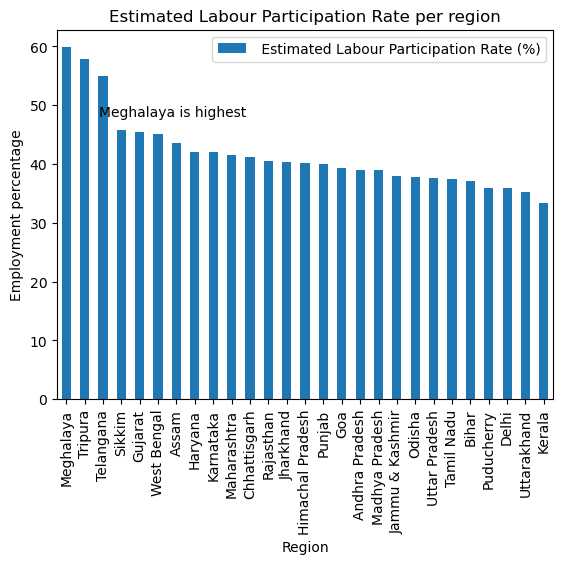

In [64]:
df1 = df0.groupby('Region')[[' Estimated Labour Participation Rate (%)']].mean().sort_values(by=' Estimated Labour Participation Rate (%)',ascending= False)
df1.plot(kind='bar')            
plt.title('Estimated Labour Participation Rate per region')
plt.ylabel('Employment percentage')
plt.xticks(rotation= 90)
plt.figtext(x= 0.19, y= 0.7, s= 'Meghalaya is highest')
plt.show()

INSIGHTS - 

- Meghalaya has the highest estimated labor participation rate.
- Tripura, Sikkim, and Telangana also have relatively high rates.
- Puducherry has the lowest estimated labor participation rate.
- Bihar, Delhi, and Kerala also have relatively low rates.
- There are significant regional disparities in labor participation rates across India.
- The states in the northeastern part of India generally have higher rates compared to the southern and western regions.